# Evaluating Hypothesis Tests

In [23]:
import numpy as np
import scipy.stats as sc
import statistics as st
import matplotlib.pyplot as plt

In [24]:
np.random.seed(0)
rand_data = np.random.normal(loc=0, scale=1, size=500)
rand_data_alt = np.random.normal(loc=1.5, scale=1, size=500)

### T-Test

In [25]:
critical_threshold = 0.05
result = sc.ttest_ind(rand_data, rand_data_alt)
print(result)
print(f"Reject Null Hypothesis at alpha of {critical_threshold}") if result.pvalue < critical_threshold else print(f"Fail to Reject Null Hypothesis at alpha of {critical_threshold}") 

Ttest_indResult(statistic=-23.372374256574872, pvalue=1.0487654938652183e-96)
Reject Null Hypothesis at alpha of 0.05


### Concept
T-statistic is in units of standard error
So a t-statistic of zero means there is no evidence that the two samples are different so fail to reject null hypothesis
The p-value is the area under the curve from the T-static to the right for a right one-tail t-test

### Visual of Choices and Errors
 - Reject $H_o$
 - Fail to reject $H_o$
 - Type I ($\alpha$) Error
 - Type II ($\beta$) Error
 
 Below is a table view.
 Further below is distribution graphic that also helps explain the concepts.

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td></td>
        <td style="border: 1px solid black; text-align: center; font-weight:bold;" colspan="2"> Truth about Population </td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;  text-align: center; font-weight:bold;"> Hypothesis </td>
        <td style="text-align: center"> True Effect ($H_1$) </td>
        <td style="text-align: center"> No Effect ($H_0$) </td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align: center;"> Reject $H_o$ </td>
        <td style="text-align: center"> True </td>
        <td style="text-align: center"> Type I / Alpha Error </td>
    </tr>
    <tr>
        <td style="border: 1px solid black; text-align: center;"> Fail to Reject $H_o$ </td>
        <td style="text-align: center"> Type II / Beta Error </td>
        <td style="text-align: center"> True </td>
    </tr>
</table>

### Other Notes
- `norm.pdf()` gives the likelihood (y) given the std. error  
- `norm.ppf()` gives the std. error (x) given the fraction of area under the curve  
- `norm.cdf()` gives the std error given the likelihood  

The alpha value used in this test is 0.05
Null Hypothesis is that P2 Mean is equal to P1 Mean
The two-sample, two-sided tail t-test results are:  
	 Statistic:  2.404078547138903 
 	 p-value:  0.01639472149046719
Reject Null Hypothesis since p-value < 0.025
Power value is 0.758
Test Statistic indicates that Sample P2 Mean is greater than Sample P1 Mean


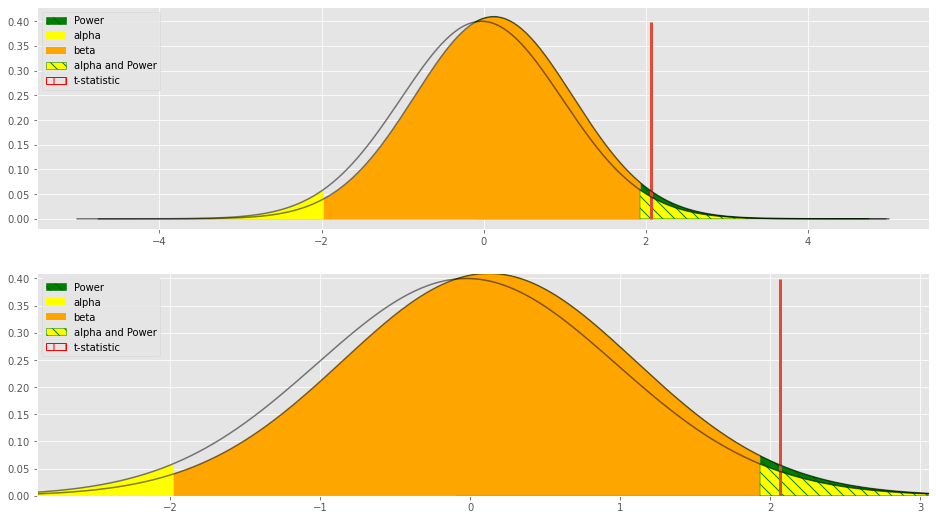

In [31]:
# function used to display distributions, calculates t-test
def t_test(p1, p2, test='two-sample', alternative='two-sided', equal_var=True, alpha=0.05, dof=None, save=None):
    """
    t_test() displays the normal distributions from the mean and standard deviation calculations of each sample (p1, p2). \
    The function also calculates the t-test test statistic and p-value.

    :param p1: sample 1
    :param p2: sample 2
    :param test: type of t-test: 'one-sample', 'two-sample', 'paired-sample'
    :param alternative: type of distribution tails: 'less', 'more', 'two-sided'
    :param equal_var: samples have equal variance: True or False
    :param alpha: acceptable critical threshold value: must be value within 0 < alpha < 1.0
    :param dof: for future use, used in calculating a t-distribution (probably not needed)
    :return: display distributions and t-test results
    """     
    
    import numpy as np
    import scipy.stats as sc
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from datetime import datetime
    import random
    
    print(f"The alpha value used in this test is {alpha}")

    # Choose appropriate test
    if test == 'one-sample':
        results = sc.ttest_1samp(p1, p2, alternative=alternative)
        print(f"The one-sample, {alternative} tail t-test results are:  ")
    elif test == 'two-sample':
        print(f"Null Hypothesis is that P2 Mean is equal to P1 Mean")
        results = sc.ttest_ind(p2,p1, alternative=alternative, equal_var=equal_var)
        print(f"The two-sample, {alternative} tail t-test results are:  ")
    elif test == 'paired-sample':
        results = sc.ttest_rel(p1, p2, alternative=alternative)
        print(f"The paired-sample, {alternative} tail t-test results are:  ")
              
    # Calculate critical threshold
    if alternative == 'two-sided':
        eval_alpha = alpha/2
    else:
        eval_alpha = alpha
    
    # Evaluate test with critical threshold
    if results.pvalue < eval_alpha:
        print(f"\t Statistic:  {results.statistic} \n \t p-value:  {results.pvalue}")
        print(f"Reject Null Hypothesis since p-value < {eval_alpha}")
    else:
        print(results)
        print(f"Fail to Reject Null Hypothesis since p-value > {eval_alpha}")

    def solve(m1,m2,std1,std2):
      a = 1/(2*std1**2) - 1/(2*std2**2)
      b = m2/(std2**2) - m1/(std1**2)
      c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
      return np.roots([a,b,c])

    # Setup plots
    plt.style.use('ggplot')
    figsize=(16,9)
    fig, (ax1, ax2)= plt.subplots(2,1, figsize=figsize)
    axes = (ax1, ax2)
    left_tail_reach = 0.000001
    right_tail_reach = 0.999999
    x_granularity = 0.001

    # Null Hypothesis
    mean_ho= np.mean(p1)
    std_ho=np.std(p1)

    # Alternative/Experimental Hypothesis
    mean_h1=np.mean(p2)
    std_h1=np.std(p2)

    # Create H_o Distribution
    iq_ho=sc.norm(mean_ho,std_ho)
    x_ho=np.linspace(mean_ho-5*std_ho, mean_ho+5*std_ho,1000)

    # Create H_1 Distribution
    iq_h1=sc.norm(mean_h1,std_h1)
    x_h1=np.linspace(mean_h1-5*std_h1, mean_h1+5*std_h1,1000)

    # Find probability density function intercepts
    # Need to add logic for multiple intercepts produced
    intercept = min(solve(mean_ho,mean_h1,std_ho,std_h1))

    # identify power area - green with dark lines and yellow with green lines area
    pl_power=np.arange(intercept,iq_h1.ppf(right_tail_reach),x_granularity)
    
    # identify alpha (right) only area - yellow only
    pr=np.arange(iq_ho.ppf(1-eval_alpha),iq_ho.ppf(right_tail_reach),x_granularity)
    
    # identify alpha (left) only area - yellow only
    pl=np.arange(iq_ho.ppf(left_tail_reach), iq_ho.ppf(eval_alpha),x_granularity)

    # beta is orange area
    pl_h1=np.arange(iq_h1.ppf(left_tail_reach),iq_ho.ppf(1-eval_alpha),x_granularity)
    beta = iq_ho.pdf(1-eval_alpha)
    print(f"Power value is {1-beta:0.3f}")
    
    # alpha and power area - yellow with green lines area
    pl_mid=np.arange(iq_ho.ppf(1-eval_alpha),iq_ho.ppf(right_tail_reach),x_granularity)
    max_curve_value = [iq_h1.pdf(pl_mid)[i] if iq_h1.pdf(pl_mid)[i] < iq_ho.pdf(pl_mid)[i] else iq_ho.pdf(pl_mid)[i] for i in range(len(pl_mid))]
    
    # Evaluate test statistic
    test_limit = results.statistic if abs(results.statistic) < 6 else 6
        
    # Interpret test statistic meaning
    if test_limit > 0:
        # p2 - p1
        print(f'Test Statistic indicates that Sample P2 Mean is greater than Sample P1 Mean')

    for ax in axes:
        # Generate plots
        ax.plot(x_ho,iq_ho.pdf(x_ho),'black', alpha=0.5)
        ax.plot(x_h1,iq_h1.pdf(x_h1),'black', alpha=0.5)
        
        # Insert vertical line indicating test statistic            
        ax.vlines(abs( iq_ho.ppf(iq_ho.pdf(test_limit)) ), 0, iq_ho.pdf(eval_alpha), linewidth=3 )
        
        # Generate color coded content
        # power area shaded green with dark lines
        ax.fill_between(pl_power,iq_h1.pdf(pl_power),facecolor='green', edgecolor='darkgreen', hatch=r"\\", alpha=1)
        # Alpha (right) shaded yellow
        ax.fill_between(pr,iq_ho.pdf(pr),color='yellow', alpha=1)
        # Beta shaded orange
        ax.fill_between(pl_h1,iq_h1.pdf(pl_h1),color='orange', alpha=1)
        # Alpha and Power shaded area
        ax.fill_between(pl_mid,max_curve_value,facecolor='yellow', edgecolor='green', hatch=r"\\", alpha=1)
        # Alpha (left) shaded yellow
        ax.fill_between(pl,iq_ho.pdf(pl),color='yellow', alpha=1)
        
        # Setup Legent
        patch1 = mpatches.Patch( facecolor='green', edgecolor='darkgreen', alpha=1, hatch=r'\\',label='Power')
        patch2 = mpatches.Patch( facecolor='yellow',alpha=1,label='alpha')
        patch3 = mpatches.Patch( facecolor='orange',alpha=1,label='beta')
        patch4 = mpatches.Patch( facecolor='yellow', edgecolor='green', alpha=1, hatch=r'\\',label='alpha and Power')
        patch5 = mpatches.Patch( facecolor='None', edgecolor='red', linewidth=1, alpha=1, hatch=r'|',label='t-statistic')

        ax.legend(handles = [patch1, patch2, patch3, patch4, patch5],loc='upper left')
        
        if ax == ax2:
            # manually set left and right limits based on experience
            plt.xlim(iq_h1.ppf(0.001), iq_ho.ppf(.999))
            plt.ylim(0, max(iq_h1.pdf(pl_h1)) )
            
        if save:
            fig.savefig(f'./images/{save}_{datetime.today().strftime("%Y_%m_%d")}_{random.randint(10, 99)}')

t_test(rand_data, rand_data_alt)

In [32]:
# The yellow/striped and green area is power
# The yellow/striped area is the alpha (type I) error
# The orange area is the beta (type II) error

The alpha value used in this test is 0.05
Null Hypothesis is that P2 Mean is equal to P1 Mean
The two-sample, two-sided tail t-test results are:  
	 Statistic:  2.404078547138903 
 	 p-value:  0.01639472149046719
Reject Null Hypothesis since p-value < 0.025
Power value is 0.758
Test Statistic indicates that Sample P2 Mean is greater than Sample P1 Mean


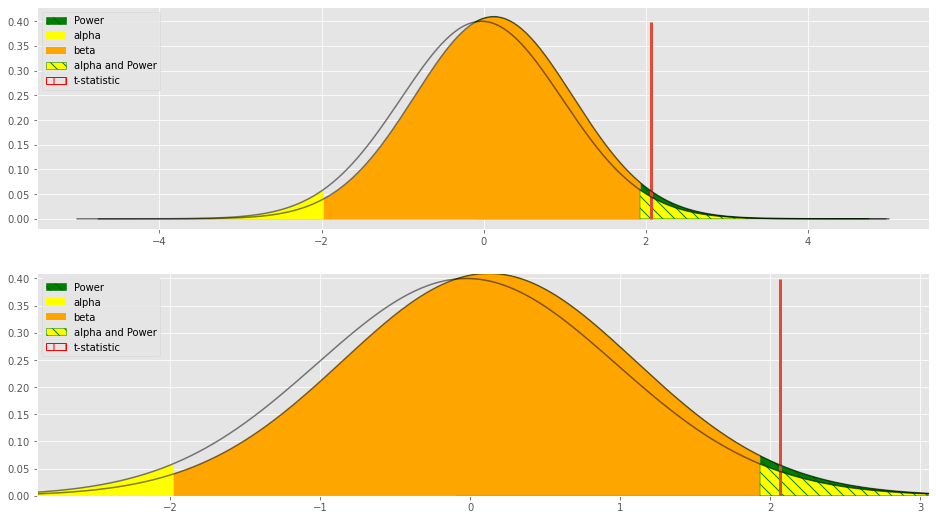

In [33]:
# between 0.18 and 0.19 the hypothesis flips
np.random.seed(0)
rand_data = np.random.normal(loc=0, scale=1, size=500)
rand_data_alt = np.random.normal(loc=0.19, scale=1, size=500)
t_test(rand_data, rand_data_alt, save="hypothesis_testing")

* Power levels are typically around 0.8.  Larger is better but typically not worth the sampling cost in most situations.

### Future Additions - Sample Size Effects
**Andrew Fisher's Formula (Fisher Exact Test)**
* Determine the population size
* Determine the confidence interval (+/- X)
* Determine the confidence level (alpha)
* Determine the standard deviation
* Convert Confidence level into Z-Score


### Confidence Intervals

In [179]:
sc.t.interval(alpha=0.95, df=len(rand_data)-1, loc=np.mean(rand_data), scale=sc.sem(rand_data)) 

(-0.11314568859421623, 0.06243680992934858)

### Calculate Type I ($\alpha$) and Type II ($\beta$) errors

In [ ]:
# alpha is shown above
# Beta is calculated area undercurve right of the critical threshold value

### Power Calculation

In [1]:
from statsmodels.stats.power import TTestIndPower
TTestIndPower().power(effect_size=0.18,nobs1=500, alpha=0.05)

0.8114761322973396

Future Work
-  Create a class to show knowledge
- utilize existing pandas and matplotlib in the devlopment

In [3]:
# power-and-sample-size-calculations
# https://www.statsmodels.org/dev/stats.html